# Importing Data

In [3458]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [3459]:
df=pd.read_excel('Dataq.xls',sheet_name="Capital Bikeshare Demand Data")

In [3460]:
df.head()

year  month  day  hour  member  weekend season  temperature  dewpoint  \
0  2016     10    1     0      80        1   fall        18.33      65.0   
1  2016     10    1     1      53        1   fall        17.78      64.0   
2  2016     10    1     2      27        1   fall        17.78      64.0   
3  2016     10    1     3      20        1   fall        17.78      64.0   
4  2016     10    1     4      11        1   fall        17.78      64.0   

   humidity  windspeed  windgust  pressure  precip  precipaccum  weather  \
0     100.0        6.0       0.0      30.1     0.0          0.0        3   
1     100.0       10.0       0.0      30.1     0.0          0.0        3   
2     100.0       10.0       0.0      30.1     0.0          0.0        3   
3     100.0       10.0       0.0      30.1     0.1          0.0        3   
4     100.0        9.0       0.0      30.1     0.0          0.0        3   

   rental  
0     103  
1      63  
2      33  
3      23  
4      11

In [3198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17466 non-null  int64  
 1   month        17466 non-null  int64  
 2   day          17466 non-null  int64  
 3   hour         17466 non-null  int64  
 4   member       17466 non-null  int64  
 5   weekend      17466 non-null  int64  
 6   season       17466 non-null  object 
 7   temperature  17466 non-null  float64
 8   dewpoint     17466 non-null  float64
 9   humidity     17466 non-null  float64
 10  windspeed    17466 non-null  float64
 11  windgust     17466 non-null  float64
 12  pressure     17466 non-null  float64
 13  precip       17466 non-null  float64
 14  precipaccum  17466 non-null  float64
 15  weather      17466 non-null  int64  
 16  rental       17466 non-null  int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 2.3+ MB


In [3199]:

df.describe()


year         month           day          hour        member  \
count  17466.000000  17466.000000  17466.000000  17466.000000  17466.000000   
mean    2017.246822      6.522902     15.704569     11.518321    317.602657   
std        0.662303      3.451445      8.791244      6.921848    315.397551   
min     2016.000000      1.000000      1.000000      0.000000      0.000000   
25%     2017.000000      4.000000      8.000000      6.000000     63.000000   
50%     2017.000000      7.000000     16.000000     12.000000    244.000000   
75%     2018.000000     10.000000     23.000000     18.000000    455.750000   
max     2018.000000     12.000000     31.000000     23.000000   1639.000000   

            weekend   temperature      dewpoint      humidity     windspeed  \
count  17466.000000  17466.000000  17466.000000  17466.000000  17466.000000   
mean       0.287759     15.557475     47.166089     65.172028      8.811951   
std        0.452731      9.794618     19.570545     19.549624      5.104676   
min        0.000000    -12.780000      0.000000     13.000000      0.000000   
25%        0.000000      7.780000     32.000000     49.000000      6.000000   
50%        0.000000     16.670000     50.000000     66.000000      8.000000   
75%        1.000000     23.890000     64.310000     82.000000     12.000000   
max        1.000000     36.110000     80.000000    100.000000     44.000000   

           windgust      pressure        precip   precipaccum       weather  \
count  17466.000000  17466.000000  17466.000000  17466.000000  17466.000000   
mean       3.095630     30.047717      0.003403      0.003845      1.774820   
std        8.664425      0.390741      0.029175      0.065460      0.703245   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        0.000000     29.900000      0.000000      0.000000      1.000000   
50%        0.000000     30.000000      0.000000      0.000000      2.000000   
75%        0.000000     30.200000      0.000000      0.000000      2.000000   
max       59.000000     30.800000      1.320000      4.000000      4.000000   

             rental  
count  17466.000000  
mean     420.144910  
std      402.473513  
min        0.000000  
25%       77.000000  
50%      315.500000  
75%      634.000000  
max     2038.000000

In [3200]:
min_threshold,max_threshold=df.rental.quantile([0.001,0.92])
min_threshold,max_threshold

(0.0, 1089.0)

In [3201]:
min_thresholds,max_thresholds=df.member.quantile([0.001,0.90])
min_thresholds,max_thresholds

(0.0, 752.0)

In [3202]:
min_thresholdw,max_thresholdw=df.hour.quantile([0.001,0.90])
min_thresholdw,max_thresholdw

(0.0, 21.0)

In [3203]:
df_clean2=df[(df['rental']<max_threshold)&(df['member']<max_thresholds)&(df['hour']<max_thresholdw)]

df=df_clean2
df_clean2.describe()

year         month           day          hour        member  \
count  13138.000000  13138.000000  13138.000000  13138.000000  13138.000000   
mean    2017.238469      6.467423     15.677729      9.431192    238.021921   
std        0.667991      3.544952      8.781938      6.087587    202.230841   
min     2016.000000      1.000000      1.000000      0.000000      0.000000   
25%     2017.000000      3.000000      8.000000      4.000000     36.000000   
50%     2017.000000      6.000000     16.000000      9.000000    221.000000   
75%     2018.000000     10.000000     23.000000     14.000000    390.000000   
max     2018.000000     12.000000     31.000000     20.000000    751.000000   

            weekend   temperature      dewpoint      humidity     windspeed  \
count  13138.000000  13138.000000  13138.000000  13138.000000  13138.000000   
mean       0.304917     14.709234     46.092876     65.968571      8.871357   
std        0.460390      9.800344     19.922161     19.654726      5.238731   
min        0.000000    -12.780000      0.000000     13.000000      0.000000   
25%        0.000000      7.220000     31.000000     50.000000      6.000000   
50%        0.000000     15.000000     48.000000     67.000000      8.000000   
75%        1.000000     22.780000     64.000000     83.000000     12.000000   
max        1.000000     36.110000     80.000000    100.000000     44.000000   

           windgust      pressure        precip   precipaccum       weather  \
count  13138.000000  13138.000000  13138.000000  13138.000000  13138.000000   
mean       3.313120     30.054456      0.003893      0.002566      1.798676   
std        8.980427      0.227555      0.032114      0.051821      0.711293   
min        0.000000     29.200000      0.000000      0.000000      1.000000   
25%        0.000000     29.900000      0.000000      0.000000      1.000000   
50%        0.000000     30.000000      0.000000      0.000000      2.000000   
75%        0.000000     30.200000      0.000000      0.000000      2.000000   
max       59.000000     30.800000      1.320000      4.000000      4.000000   

             rental  
count  13138.000000  
mean     324.750343  
std      290.370362  
min        0.000000  
25%       48.000000  
50%      269.500000  
75%      542.000000  
max     1088.000000

<AxesSubplot:xlabel='member'>

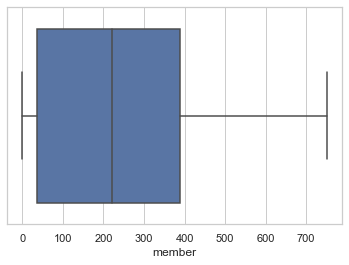

In [3204]:
sns.boxplot(x='member',data=df_clean2)



<AxesSubplot:xlabel='rental'>

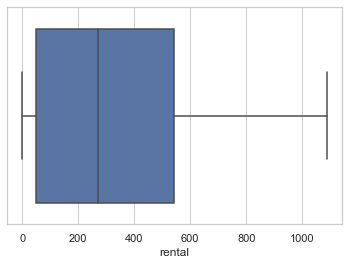

In [3205]:
sns.boxplot(x='rental',data=df_clean2)


In [3207]:
season=df.groupby('season')

In [3447]:
season['rental'].mean()



season
fall      338.998122
spring    334.226751
summer    411.173871
winter    228.286438
Name: rental, dtype: float64

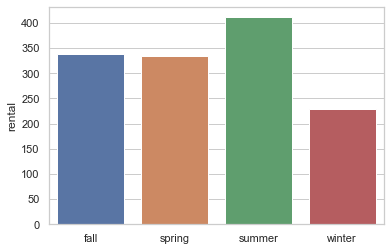

In [3448]:
sns.barplot(x=['fall','spring','summer','winter'],y=season['rental'].mean())
plt.savefig('save_as_a_png.png')

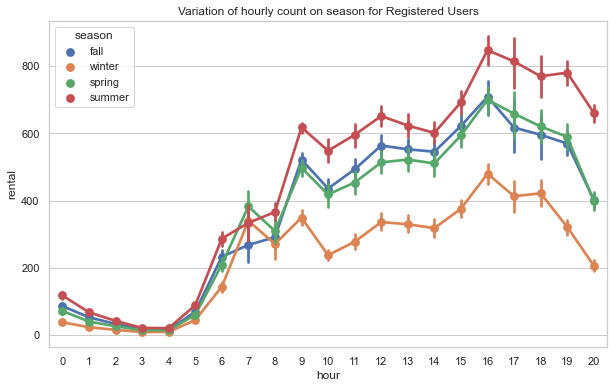

In [3462]:
plt.figure(figsize=(10,6))
ax = sns.pointplot(x='hour', y='rental', data=df_clean2, hue='season')
ax.set_title('Variation of hourly count on season for Registered Users')
sns.set(style="whitegrid")
plt.savefig('rental_vs_hour_seasonlity.png')

In [3211]:
df.groupby(['season']).describe()['rental']

count        mean         std  min   25%    50%    75%     max
season                                                                 
fall    3195.0  338.998122  289.407305  0.0  53.0  324.0  552.0  1086.0
spring  3312.0  334.226751  294.053689  0.0  47.0  291.0  565.0  1086.0
summer  3077.0  411.173871  330.892254  0.0  71.0  424.0  677.0  1088.0
winter  3554.0  228.286438  212.237044  0.0  31.0  191.0  360.0  1040.0

In [3212]:
df.groupby('weather').describe()['rental']

count        mean         std  min    25%    50%     75%     max
weather                                                                   
1        4597.0  331.820318  297.646518  0.0  41.00  284.0  557.00  1088.0
2        6904.0  347.082851  293.167612  0.0  59.75  316.0  566.25  1088.0
3        1322.0  184.371407  191.576520  0.0  37.00  119.5  272.75  1052.0
4         315.0  321.247619  303.717585  0.0  41.00  216.0  563.00  1067.0

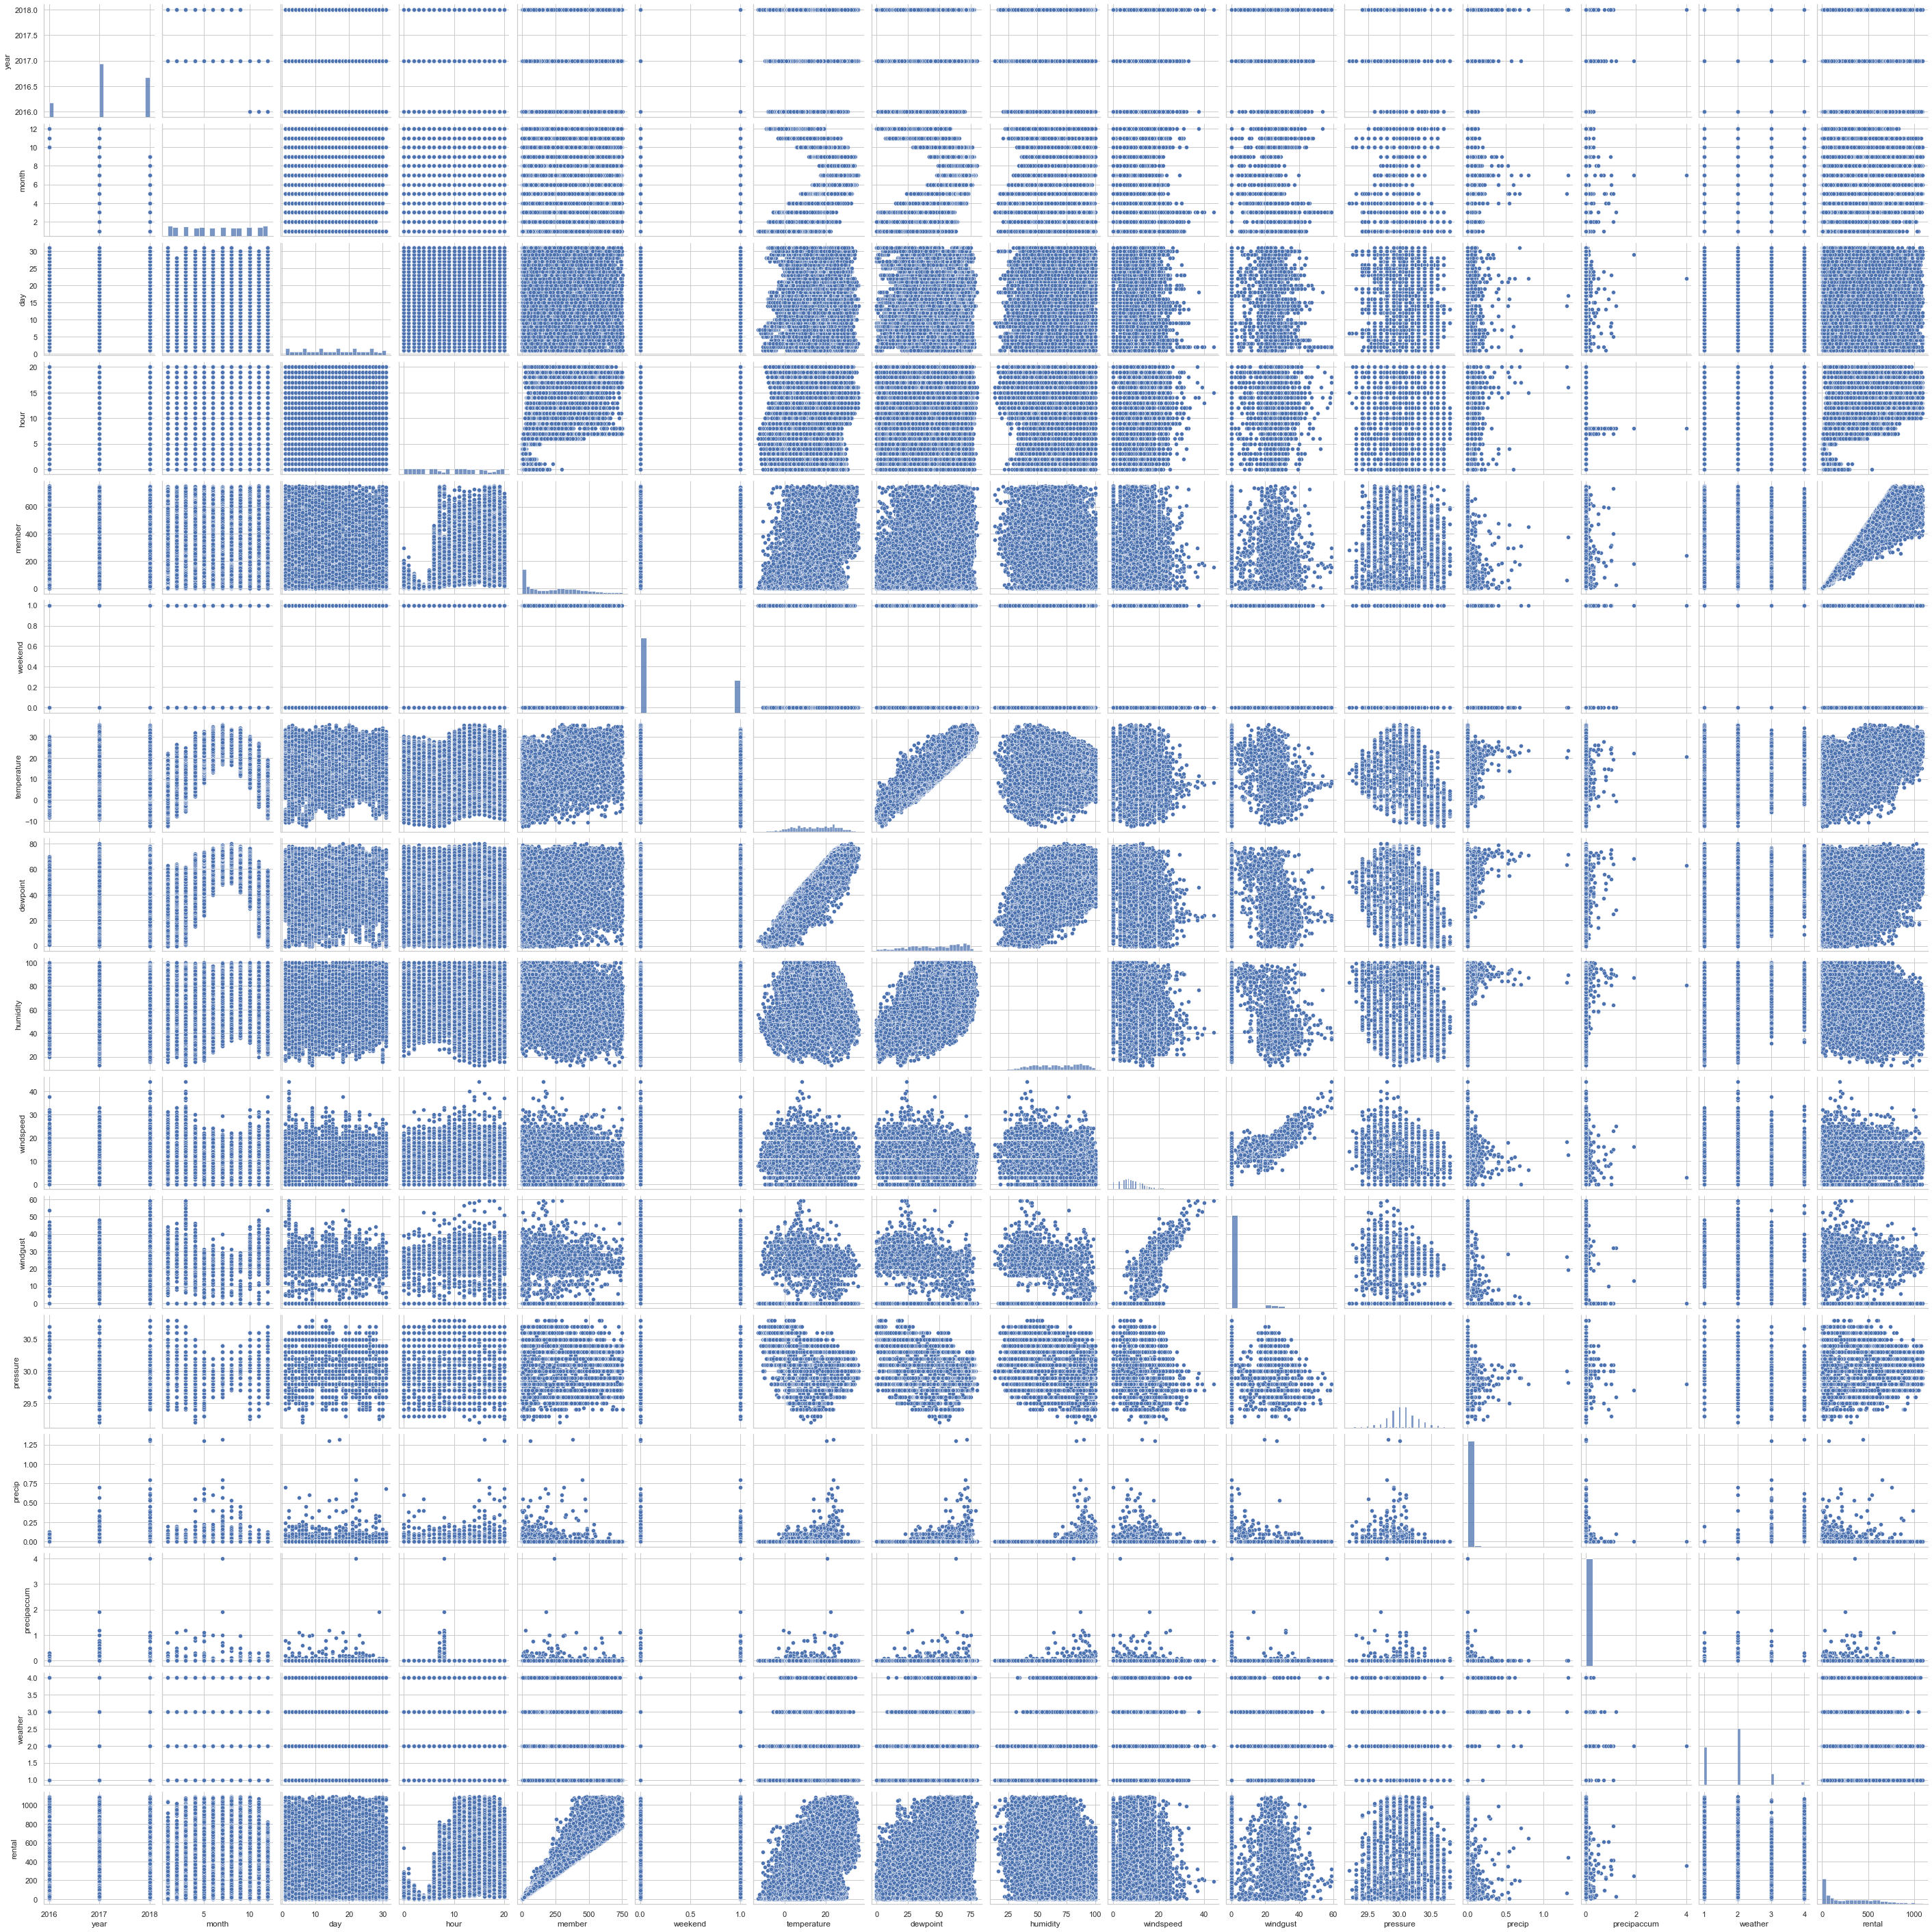

In [3213]:
sns.pairplot(df)

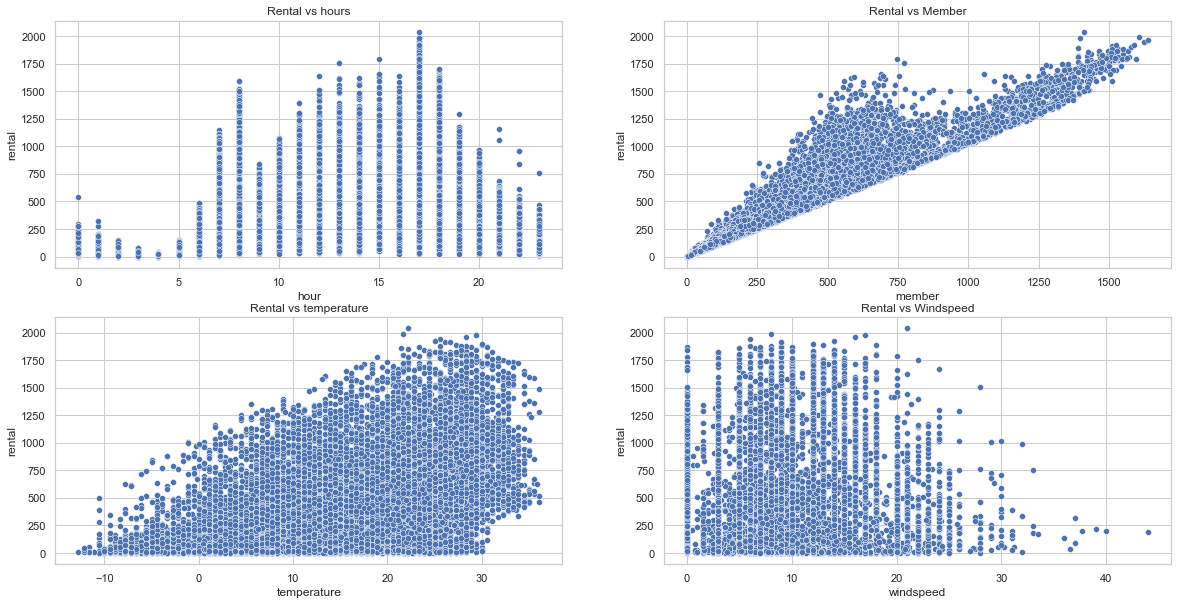

In [3463]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
def scatterplotfuction(a,b,X,Y,Data,title):
    
    sns.scatterplot(ax=ax[a][b],x=X,y=Y,data=Data)
    ax[a][b].set_title(title)
    


scatterplotfuction(0,0,df.hour,df.rental,df,"Rental vs hours")
plt.savefig('rentalvshour.png')
scatterplotfuction(0,1,df.member,df.rental,df,"Rental vs Member")
scatterplotfuction(1,0,df.temperature,df.rental,df,"Rental vs temperature")
scatterplotfuction(1,1,df.windspeed,df.rental,df,"Rental vs Windspeed")



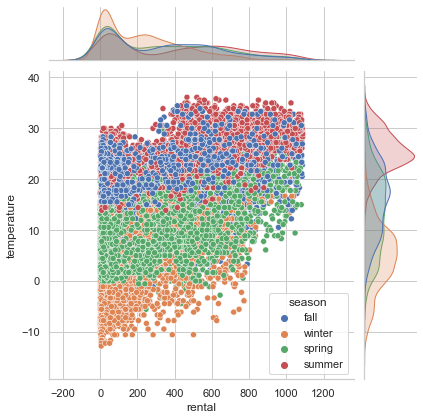

In [3441]:
sns.jointplot(x='rental',y='temperature',data=df_clean2,hue='season')
plt.savefig('save_as_a_png.png')

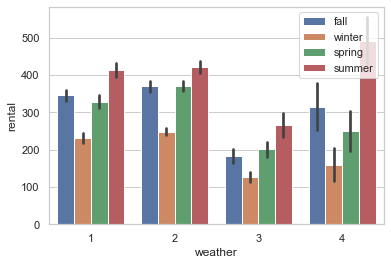

In [3454]:
ax=sns.barplot(y='rental',x='weather',data=df_clean2,hue='season')
ax.legend(loc='best')
plt.savefig('weather_vs_rental_seasonlity.png')


weather
1    438.654773
2    445.869476
3    195.953564
4    394.476303
Name: rental, dtype: float64

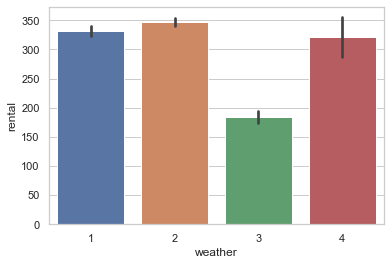

In [3461]:
sns.barplot(x='weather',y='rental',data=df_clean2)
plt.savefig('weather_vsrental.png')
df.groupby('weather').mean()['rental']

In [3420]:
tc=df_clean2.corr()
tc

year     month       day      hour    member   weekend  \
year         1.000000 -0.508109 -0.019105 -0.012072  0.036911 -0.008739   
month       -0.508109  1.000000  0.025725 -0.008176  0.036586  0.018447   
day         -0.019105  0.025725  1.000000 -0.001978 -0.008781 -0.013047   
hour        -0.012072 -0.008176 -0.001978  1.000000  0.669864  0.020958   
member       0.036911  0.036586 -0.008781  0.669864  1.000000 -0.078102   
weekend     -0.008739  0.018447 -0.013047  0.020958 -0.078102  1.000000   
temperature  0.142815  0.204074  0.035710  0.126496  0.319958 -0.038454   
dewpoint     0.132123  0.218579  0.054080 -0.049512  0.128923 -0.019128   
humidity     0.020158  0.099546  0.057696 -0.345202 -0.313530  0.030543   
windspeed    0.009149 -0.135315 -0.036615  0.214539  0.122690  0.004900   
windgust    -0.037955 -0.091631 -0.047281  0.142600  0.059867 -0.017889   
pressure    -0.035701  0.049919 -0.065131 -0.020301 -0.034504  0.043087   
precip       0.049518 -0.004824 -0.004801  0.050065 -0.055640  0.003432   
precipaccum  0.012889 -0.008518 -0.001145 -0.013683  0.007173  0.037047   
weather      0.102013 -0.086118  0.029619  0.048036 -0.068590  0.019411   
rental       0.031691  0.042350 -0.004168  0.664584  0.951649  0.034578   

             temperature  dewpoint  humidity  windspeed  windgust  pressure  \
year            0.142815  0.132123  0.020158   0.009149 -0.037955 -0.035701   
month           0.204074  0.218579  0.099546  -0.135315 -0.091631  0.049919   
day             0.035710  0.054080  0.057696  -0.036615 -0.047281 -0.065131   
hour            0.126496 -0.049512 -0.345202   0.214539  0.142600 -0.020301   
member          0.319958  0.128923 -0.313530   0.122690  0.059867 -0.034504   
weekend        -0.038454 -0.019128  0.030543   0.004900 -0.017889  0.043087   
temperature     1.000000  0.903464  0.167506  -0.114565 -0.166580 -0.330699   
dewpoint        0.903464  1.000000  0.565159  -0.223557 -0.271017 -0.356273   
humidity        0.167506  0.565159  1.000000  -0.295235 -0.301635 -0.209934   
windspeed      -0.114565 -0.223557 -0.295235   1.000000  0.655448 -0.185713   
windgust       -0.166580 -0.271017 -0.301635   0.655448  1.000000 -0.173169   
pressure       -0.330699 -0.356273 -0.209934  -0.185713 -0.173169  1.000000   
precip          0.035753  0.088793  0.149855   0.041909  0.016692 -0.087454   
precipaccum    -0.000622  0.017371  0.044503   0.013359  0.013398 -0.035243   
weather         0.036828  0.197515  0.414017   0.039796 -0.044916 -0.215664   
rental          0.418311  0.199042 -0.339060   0.112880  0.046470 -0.053037   

               precip  precipaccum   weather    rental  
year         0.049518     0.012889  0.102013  0.031691  
month       -0.004824    -0.008518 -0.086118  0.042350  
day         -0.004801    -0.001145  0.029619 -0.004168  
hour         0.050065    -0.013683  0.048036  0.664584  
member      -0.055640     0.007173 -0.068590  0.951649  
weekend      0.003432     0.037047  0.019411  0.034578  
temperature  0.035753    -0.000622  0.036828  0.418311  
dewpoint     0.088793     0.017371  0.197515  0.199042  
humidity     0.149855     0.044503  0.414017 -0.339060  
windspeed    0.041909     0.013359  0.039796  0.112880  
windgust     0.016692     0.013398 -0.044916  0.046470  
pressure    -0.087454    -0.035243 -0.215664 -0.053037  
precip       1.000000     0.012198  0.240355 -0.056193  
precipaccum  0.012198     1.000000  0.024651 -0.001272  
weather      0.240355     0.024651  1.000000 -0.081189  
rental      -0.056193    -0.001272 -0.081189  1.000000

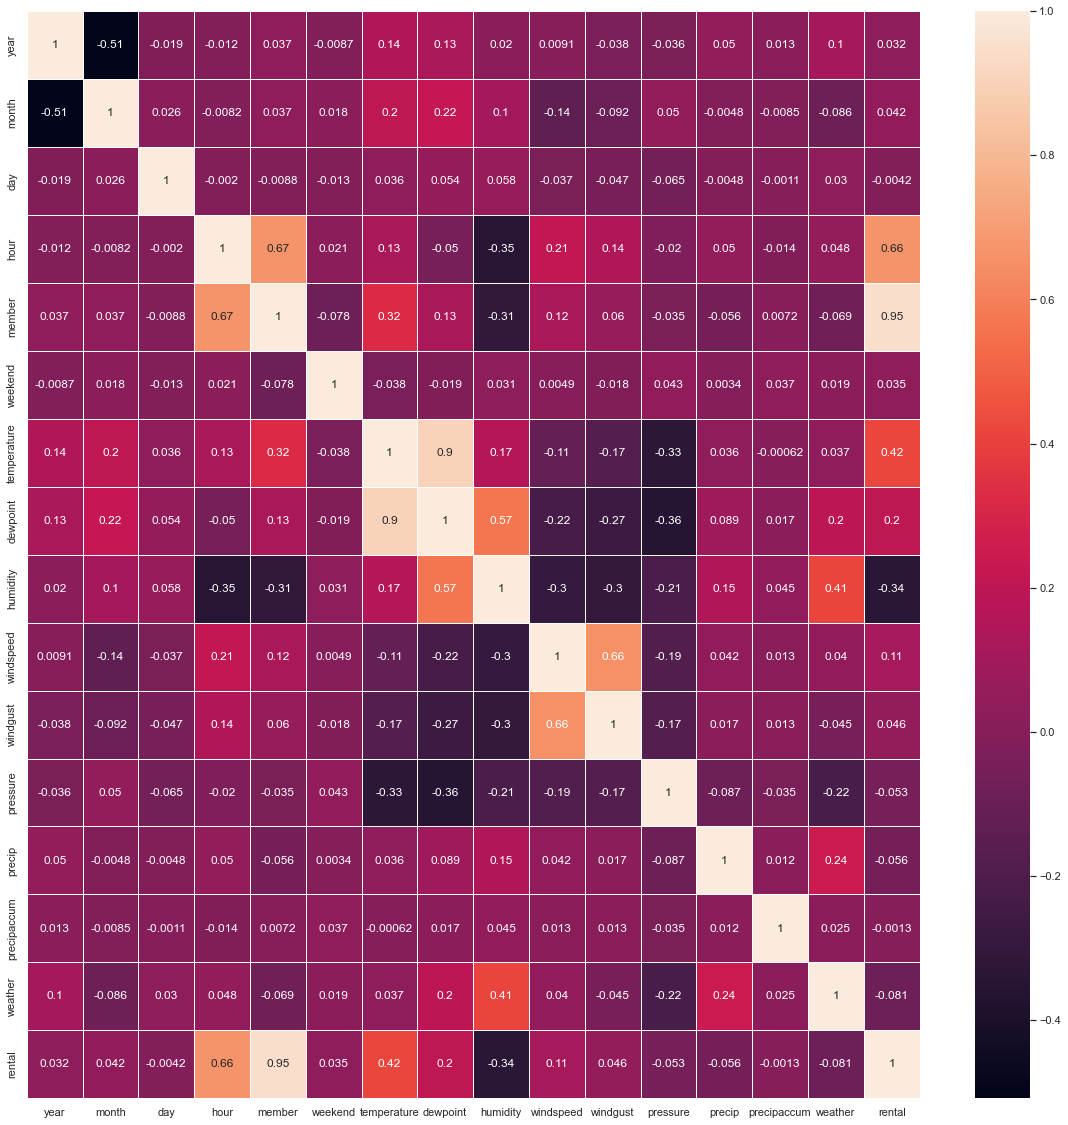

In [3464]:
plt.figure(figsize=[20,20])
sns.heatmap(tc,annot=True,linewidth=1)
plt.savefig('heatmap.png')

<AxesSubplot:xlabel='weather', ylabel='rental'>

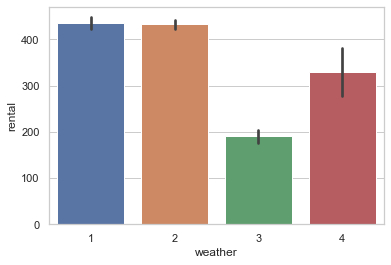

In [3219]:
sns.barplot(x='weather',y='rental',data=ab)

In [3220]:
aa=df.groupby(['season','weather']).describe()['member']
aa

count        mean         std  min     25%    50%     75%  \
season weather                                                               
fall   1        1375.0  255.573091  212.774632  0.0   30.00  263.0  422.00   
       2        1433.0  271.110258  204.382649  0.0   61.00  282.0  422.00   
       3         332.0  152.527108  152.967413  0.0   28.50  108.0  229.50   
       4          55.0  256.781818  213.055435  2.0   17.00  268.0  404.50   
spring 1        1039.0  234.624639  201.257065  0.0   27.50  228.0  395.50   
       2        1780.0  256.404494  200.929055  0.0   49.00  262.0  401.00   
       3         399.0  162.305764  163.170031  0.0   26.00  119.0  239.50   
       4          94.0  188.127660  195.984980  0.0   34.25  111.0  292.50   
summer 1        1101.0  271.534968  213.875941  0.0   45.00  298.0  441.00   
       2        1669.0  283.761534  220.313864  0.0   46.00  313.0  455.00   
       3         204.0  198.313725  173.659736  1.0   54.75  136.5  313.75   
       4         103.0  333.417476  216.389424  0.0  131.00  366.0  513.00   
winter 1        1082.0  197.433457  184.919058  0.0   21.25  168.0  314.75   
       2        2022.0  211.057369  182.385671  0.0   35.25  196.0  315.00   
       3         387.0  113.087855  120.599206  0.0   24.00   76.0  158.00   
       4          63.0  132.301587  154.092205  0.0    9.00   49.0  236.50   

                  max  
season weather         
fall   1        751.0  
       2        750.0  
       3        727.0  
       4        698.0  
spring 1        744.0  
       2        751.0  
       3        740.0  
       4        706.0  
summer 1        747.0  
       2        749.0  
       3        738.0  
       4        731.0  
winter 1        750.0  
       2        748.0  
       3        681.0  
       4        699.0

In [3221]:
import scipy.stats as sp


In [3223]:
df.groupby(['temperature','hour'])['member']
df.describe()


year         month           day          hour        member  \
count  13138.000000  13138.000000  13138.000000  13138.000000  13138.000000   
mean    2017.238469      6.467423     15.677729      9.431192    238.021921   
std        0.667991      3.544952      8.781938      6.087587    202.230841   
min     2016.000000      1.000000      1.000000      0.000000      0.000000   
25%     2017.000000      3.000000      8.000000      4.000000     36.000000   
50%     2017.000000      6.000000     16.000000      9.000000    221.000000   
75%     2018.000000     10.000000     23.000000     14.000000    390.000000   
max     2018.000000     12.000000     31.000000     20.000000    751.000000   

            weekend   temperature      dewpoint      humidity     windspeed  \
count  13138.000000  13138.000000  13138.000000  13138.000000  13138.000000   
mean       0.304917     14.709234     46.092876     65.968571      8.871357   
std        0.460390      9.800344     19.922161     19.654726      5.238731   
min        0.000000    -12.780000      0.000000     13.000000      0.000000   
25%        0.000000      7.220000     31.000000     50.000000      6.000000   
50%        0.000000     15.000000     48.000000     67.000000      8.000000   
75%        1.000000     22.780000     64.000000     83.000000     12.000000   
max        1.000000     36.110000     80.000000    100.000000     44.000000   

           windgust      pressure        precip   precipaccum       weather  \
count  13138.000000  13138.000000  13138.000000  13138.000000  13138.000000   
mean       3.313120     30.054456      0.003893      0.002566      1.798676   
std        8.980427      0.227555      0.032114      0.051821      0.711293   
min        0.000000     29.200000      0.000000      0.000000      1.000000   
25%        0.000000     29.900000      0.000000      0.000000      1.000000   
50%        0.000000     30.000000      0.000000      0.000000      2.000000   
75%        0.000000     30.200000      0.000000      0.000000      2.000000   
max       59.000000     30.800000      1.320000      4.000000      4.000000   

             rental  
count  13138.000000  
mean     324.750343  
std      290.370362  
min        0.000000  
25%       48.000000  
50%      269.500000  
75%      542.000000  
max     1088.000000

In [3476]:
x=df_clean2[['hour', 'weekend', 
       'temperature', 'humidity', 'weather','member']]
y=df_clean2['rental']
from sklearn.model_selection import train_test_split

In [3477]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=100)

In [3478]:
lm=LinearRegression()

In [3479]:
lm.fit(X_train,y_train)

LinearRegression()

In [3480]:
print(lm.intercept_)

7.661538144718236


In [3481]:
lm.coef_

array([ 1.70029042, 69.65918193,  4.80374133, -1.34190266,  2.6879024 ,
        1.23072953])

In [3482]:
pd.DataFrame(lm.coef_,X_train.columns,['coeff'])

coeff
hour          1.700290
weekend      69.659182
temperature   4.803741
humidity     -1.341903
weather       2.687902
member        1.230730

In [3483]:
predictions=lm.predict(X_test)

In [3484]:
predictions

array([751.68113214, 127.43433154, 101.57782557, ..., 681.44405897,
       -25.71824525, 605.47143563])

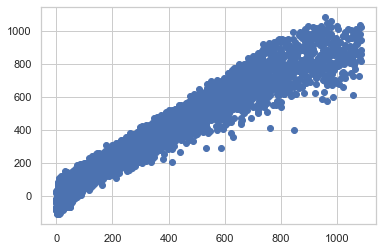

In [3485]:
plt.scatter(y_test,predictions)
plt.savefig('regression_scatter_plot.png')

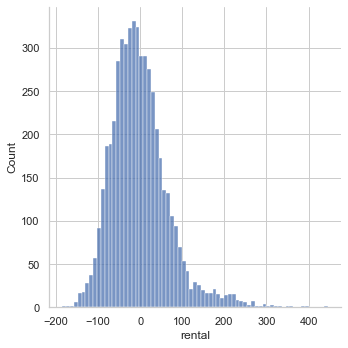

In [3486]:
sns.displot(y_test-predictions)
plt.savefig('regression_histogram_plot.png')

In [3487]:
from sklearn import metrics

In [3488]:
metrics.mean_absolute_error(y_test,predictions)

51.72777377039538

In [3489]:
error=metrics.mean_squared_error(y_test,predictions)
error

4824.246535318773

In [3490]:
np.sqrt(error)

69.45679617804706

In [3491]:
from sklearn.metrics import r2_score

In [3492]:
r2_score(y_test,predictions)

0.941938575834556

In [3493]:
ad = df['member']<=df['rental']
ad.describe()

count     17466
unique        1
top        True
freq      17466
dtype: object

In [3494]:
x=df3[[ 'hour',  
       'temperature', 'humidity' ]]
y=df3['rental']
from sklearn.model_selection import train_test_split

In [3422]:
non_registered_users=df_clean2['rental']-df_clean2['member']
non_registered_users

0         23
1         10
2          6
3          3
4          0
        ... 
17456    354
17458    341
17460    239
17461    125
17462    101
Length: 13138, dtype: int64

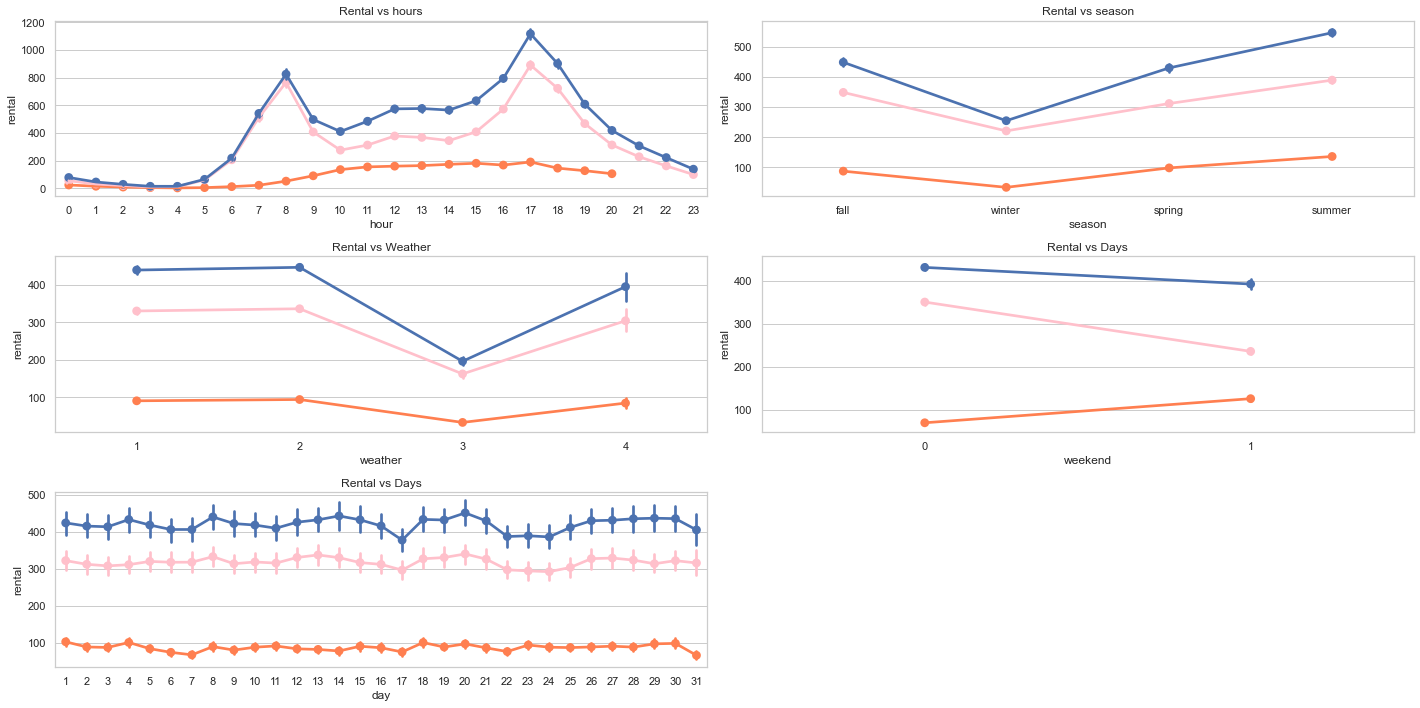

In [3465]:
fig,ax=plt.subplots(3,2,figsize=(20,10))
plt.tight_layout()
def scatterplotfuction(a,b,X,Y,Data,title,ym,dr):
    
    sns.pointplot(ax=ax[a][b],x=X,y=Y,data=Data,color='coral')
    sns.pointplot(ax=ax[a][b],x=X,y=ym,data=Data,color='pink')
    sns.pointplot(ax=ax[a][b],x=X,y=dr,data=Data)
    ax[a][b].set_title(title)
    


scatterplotfuction(0,0,df.hour,non_registered_users,df_clean2,"Rental vs hours",df.member,df.rental)
scatterplotfuction(0,1,df.season,non_registered_users,df_clean2,"Rental vs season",df.member,df.rental)
scatterplotfuction(1,0,df.weather,non_registered_users,df_clean2,"Rental vs Weather",df.member,df.rental)
scatterplotfuction(1,1,df.weekend,non_registered_users,df_clean2,"Rental vs Days",df.member,df.rental)
scatterplotfuction(2,0,df.day,non_registered_users,df_clean2,"Rental vs Days",df.member,df.rental)
plt.tight_layout()
fig.delaxes(ax[2][1])
plt.savefig('membervscausal.png')
